In [54]:
%%capture
!git clone https://github.com/IS737StockPicker/stonks

In [55]:
import pandas as pd
from datetime import datetime
from datetime import date
stock_data= pd.read_csv('/content/stonks/Stocks_march_sept.csv')
#stock_data['Date'] = stock_data['Date'].dt.date(stock_data['Date'])

stock_data["Date"] = pd.to_datetime(stock_data["Date"], errors='coerce',utc=True)
stock_data['Date'] = stock_data['Date'].dt.strftime('%Y-%m-%d')
stock_data.head()
#stock_data.info()
#stock_data['Date'].day()
#stock_data.dtypes
#stock_data['Date'].astype()

Date  XLE  XLF  XLU  XLI  XLK  XLV  XLY  IYR  AAPL  XLB  XLP  SPY  \
0  2022-03-14    0    0    0    0    0    0    0    0     0    0    0    0   
1  2022-03-15    1    1    1    1    1    1    1    0     1    1    1    1   
2  2022-03-16    0    1    0    1    1    1    1    1     1    1    0    1   
3  2022-03-17    1    1    1    1    1    1    1    1     1    1    1    1   
4  2022-03-18    1    1    0    1    1    1    1    1     1    1    1    1   

   ^DJI  NDX  
0     0  0.0  
1     1  1.0  
2     1  1.0  
3     1  1.0  
4     1  1.0

In [56]:
Guardian_Data= pd.read_csv('/content/stonks/guardian_data.csv')
Guardian_Data.head()

Date  Headline Mean  Body Mean  Headline Median  Body Median
0  2022-03-13          -0.08      -0.15             0.00        -0.88
1  2022-03-14          -0.13      -0.01             0.00        -0.00
2  2022-03-15          -0.20      -0.12            -0.15        -0.54
3  2022-03-16          -0.08      -0.16             0.00        -0.55
4  2022-03-17          -0.10      -0.24             0.00        -0.85

In [57]:
Huff_News_Data = pd.read_csv('/content/stonks/Huff_News_Avg_News_Sentiment.csv')
Huff_News_Data.head()

Date  Headline Mean  Body Mean  Headline Median  Body Median
0  2022-03-13          -0.24       0.05            -0.21         0.19
1  2022-03-14          -0.12      -0.06             0.00         0.00
2  2022-03-15          -0.44      -0.39            -0.46        -0.47
3  2022-03-16           0.10      -0.09             0.00        -0.13
4  2022-03-17          -0.20      -0.14            -0.03        -0.03

In [58]:
NYT_Data = pd.read_csv('/content/stonks/ny_times_data.csv')
NYT_Data.head()

Date  Headline Mean  Headline Median  Body Mean  Body Median
0  2022-03-13          -0.11              0.0       0.22         0.25
1  2022-03-14          -0.05              0.0      -0.03         0.00
2  2022-03-15          -0.09              0.0       0.02         0.00
3  2022-03-16          -0.06              0.0      -0.00         0.00
4  2022-03-17          -0.02              0.0      -0.05         0.00

# Merge Stock Data and News Data

In [59]:
daily_stock_mixed_news = stock_data.merge(Guardian_Data, how='inner', on='Date')
daily_stock_mixed_news = daily_stock_mixed_news.merge(Huff_News_Data, how='inner', on='Date')
daily_stock_mixed_news = daily_stock_mixed_news.merge(NYT_Data, how='inner', on='Date')

daily_stock_mixed_news.columns = daily_stock_mixed_news.columns.str.replace(' ', '_')
daily_stock_mixed_news['XLE'].sum()
daily_stock_mixed_news['XLI'].sum()
daily_stock_mixed_news.info()
sum_column = daily_stock_mixed_news.sum(axis=0)
print (sum_column)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 124
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               125 non-null    object 
 1   XLE                125 non-null    int64  
 2   XLF                125 non-null    int64  
 3   XLU                125 non-null    int64  
 4   XLI                125 non-null    int64  
 5   XLK                125 non-null    int64  
 6   XLV                125 non-null    int64  
 7   XLY                125 non-null    int64  
 8   IYR                125 non-null    int64  
 9   AAPL               125 non-null    int64  
 10  XLB                125 non-null    int64  
 11  XLP                125 non-null    int64  
 12  SPY                125 non-null    int64  
 13  ^DJI               125 non-null    int64  
 14  NDX                125 non-null    float64
 15  Headline_Mean_x    125 non-null    float64
 16  Body_Mean_x        125 non

Preprocess the data:
Cleaning the data to avoid any missing values

In [60]:
daily_stock_mixed_news.dropna()

Date  XLE  XLF  XLU  XLI  XLK  XLV  XLY  IYR  AAPL  ...  \
0    2022-03-14    0    0    0    0    0    0    0    0     0  ...   
1    2022-03-15    1    1    1    1    1    1    1    0     1  ...   
2    2022-03-16    0    1    0    1    1    1    1    1     1  ...   
3    2022-03-17    1    1    1    1    1    1    1    1     1  ...   
4    2022-03-18    1    1    0    1    1    1    1    1     1  ...   
..          ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...   
120  2022-09-07    1    1    1    1    1    1    1    1     1  ...   
121  2022-09-08    0    1    1    1    1    1    1    1     0  ...   
122  2022-09-09    1    1    0    1    1    1    1    1     1  ...   
123  2022-09-12    1    1    1    1    1    1    1    1     1  ...   
124  2022-09-13    0    0    0    0    0    0    0    0     0  ...   

     Headline_Median_x  Body_Median_x  Headline_Mean_y  Body_Mean_y  \
0                 0.00          -0.00            -0.12        -0.06   
1                -0.15          -0.54            -0.44        -0.39   
2                 0.00          -0.55             0.10        -0.09   
3                 0.00          -0.85            -0.20        -0.14   
4                 0.00          -0.31            -0.35        -0.30   
..                 ...            ...              ...          ...   
120               0.00           0.83            -0.19        -0.19   
121               0.00           0.89            -0.25        -0.76   
122               0.00           0.95            -0.10         0.25   
123               0.00           0.10            -0.40         0.27   
124               0.00           0.54            -0.10        -0.08   

     Headline_Median_y  Body_Median_y  Headline_Mean  Headline_Median  \
0                 0.00           0.00          -0.05              0.0   
1                -0.46          -0.47          -0.09              0.0   
2                 0.00          -0.13          -0.06              0.0   
3                -0.03          -0.03          -0.02              0.0   
4                -0.32          -0.22          -0.06              0.0   
..                 ...            ...            ...              ...   
120               0.00          -0.33           0.09              0.0   
121              -0.48          -0.75          -0.04              0.0   
122              -0.10           0.25          -0.01              0.0   
123              -0.42           0.38          -0.10              0.0   
124              -0.08           0.00          -0.05              0.0   

     Body_Mean  Body_Median  
0        -0.03         0.00  
1         0.02         0.00  
2        -0.00         0.00  
3        -0.05         0.00  
4        -0.05        -0.08  
..         ...          ...  
120      -0.07         0.00  
121      -0.02         0.00  
122       0.14         0.14  
123      -0.06        -0.13  
124      -0.03        -0.03  

[125 rows x 27 columns]

# Multi-Output Decision Tree Classifier for Predicting Stock Indicators Based on News Sentiment and Market Data



Accuracy for XLE: 0.64

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.50      0.40         6
           1       0.81      0.68      0.74        19

    accuracy                           0.64        25
   macro avg       0.57      0.59      0.57        25
weighted avg       0.70      0.64      0.66        25

Accuracy for XLF: 0.68

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.56      0.56         9
           1       0.75      0.75      0.75        16

    accuracy                           0.68        25
   macro avg       0.65      0.65      0.65        25
weighted avg       0.68      0.68      0.68        25

Accuracy for XLU: 0.48

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.33      0.38        12
           1       0.50      0.62      0.55        13

    accuracy                           0.

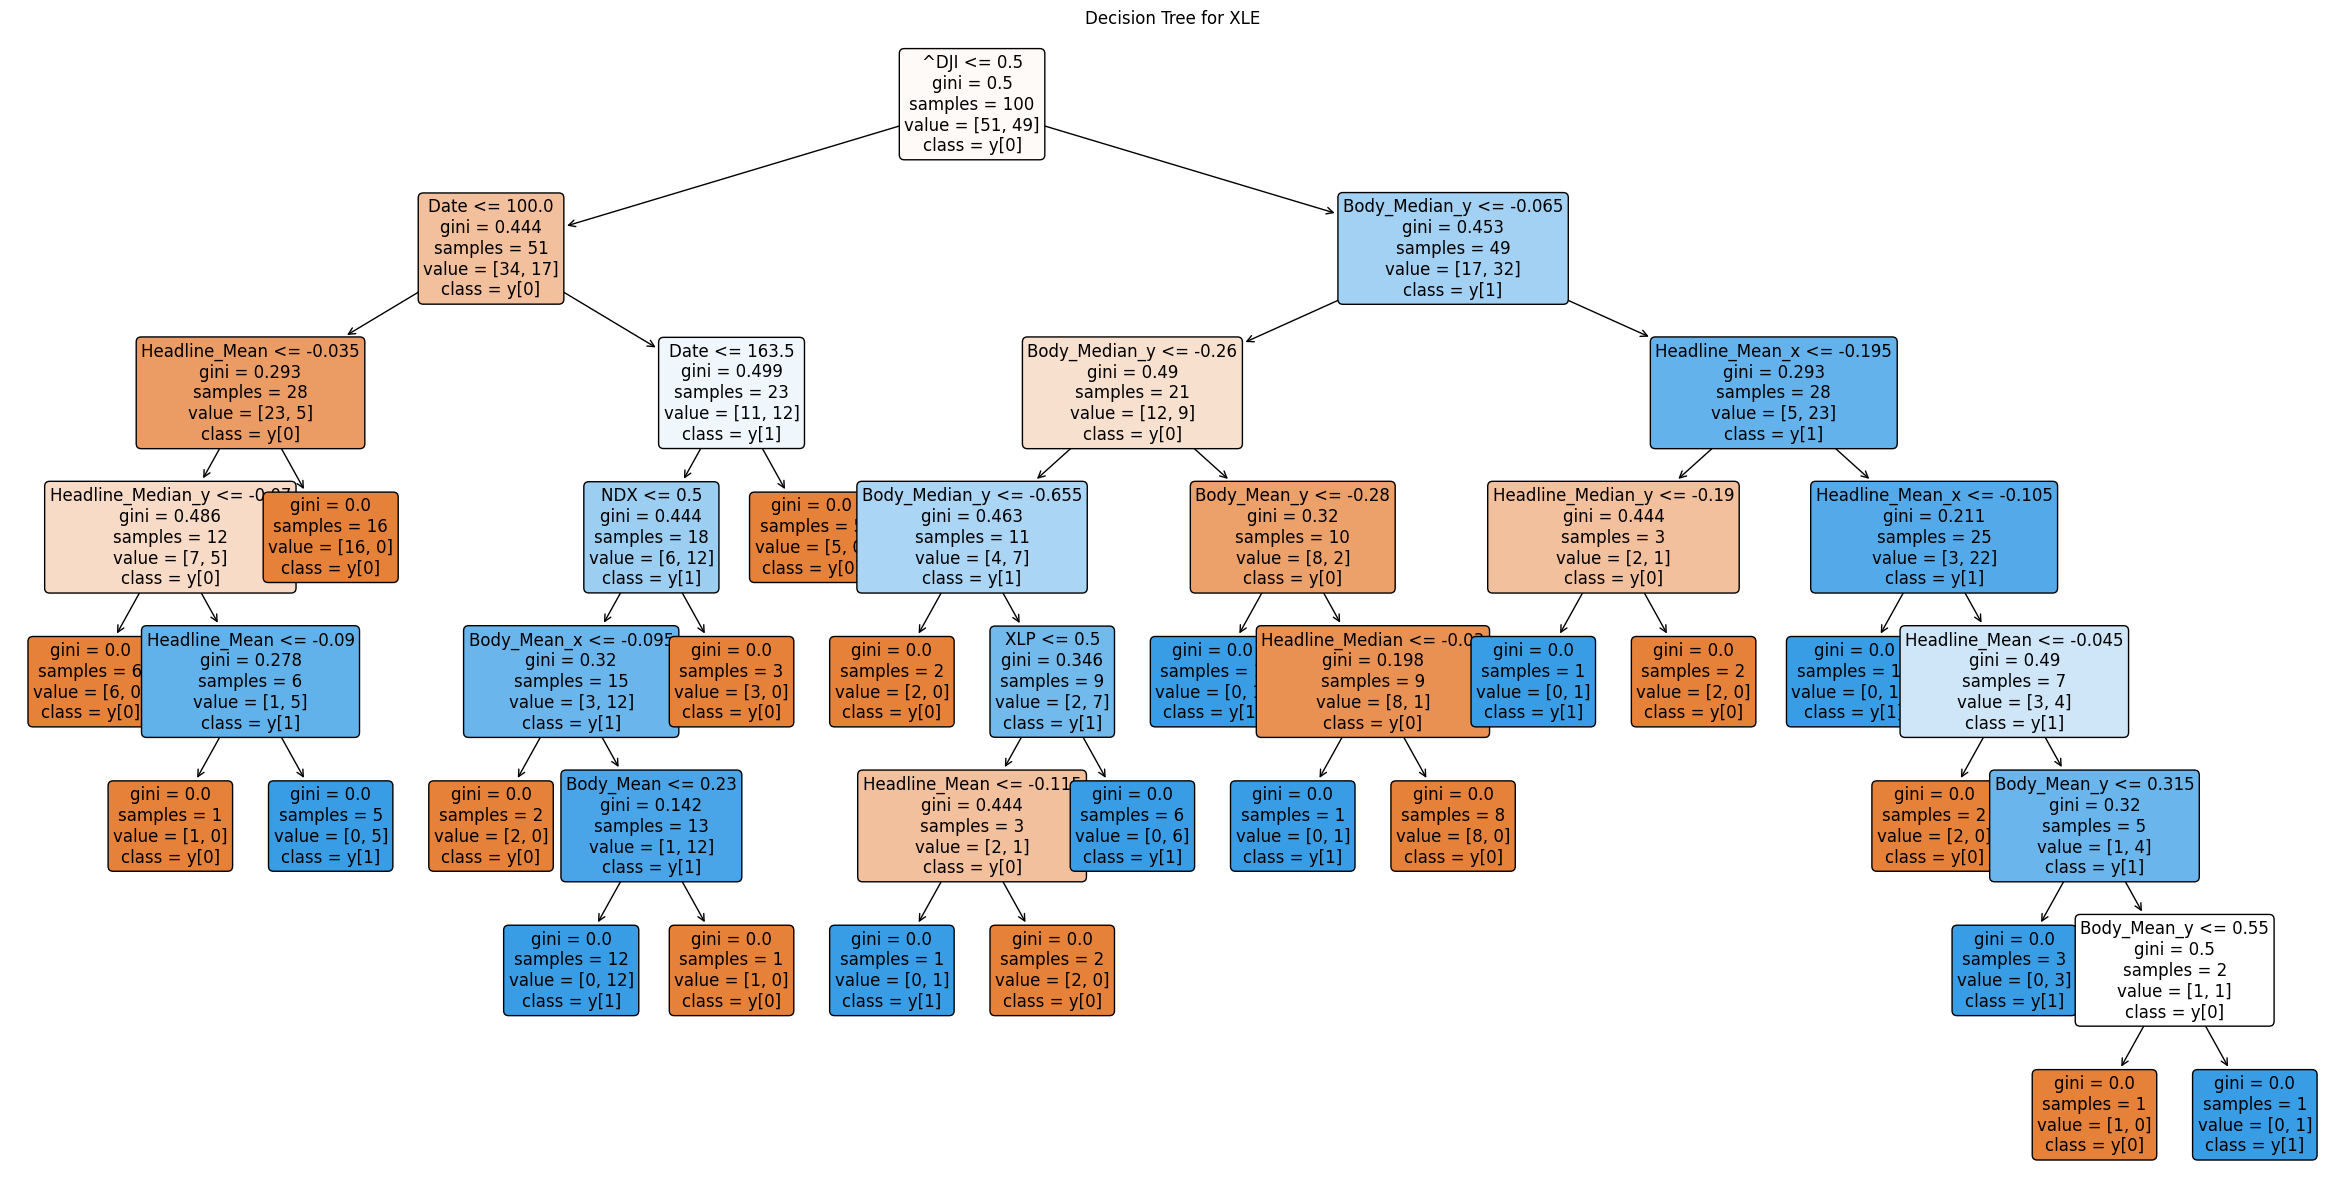

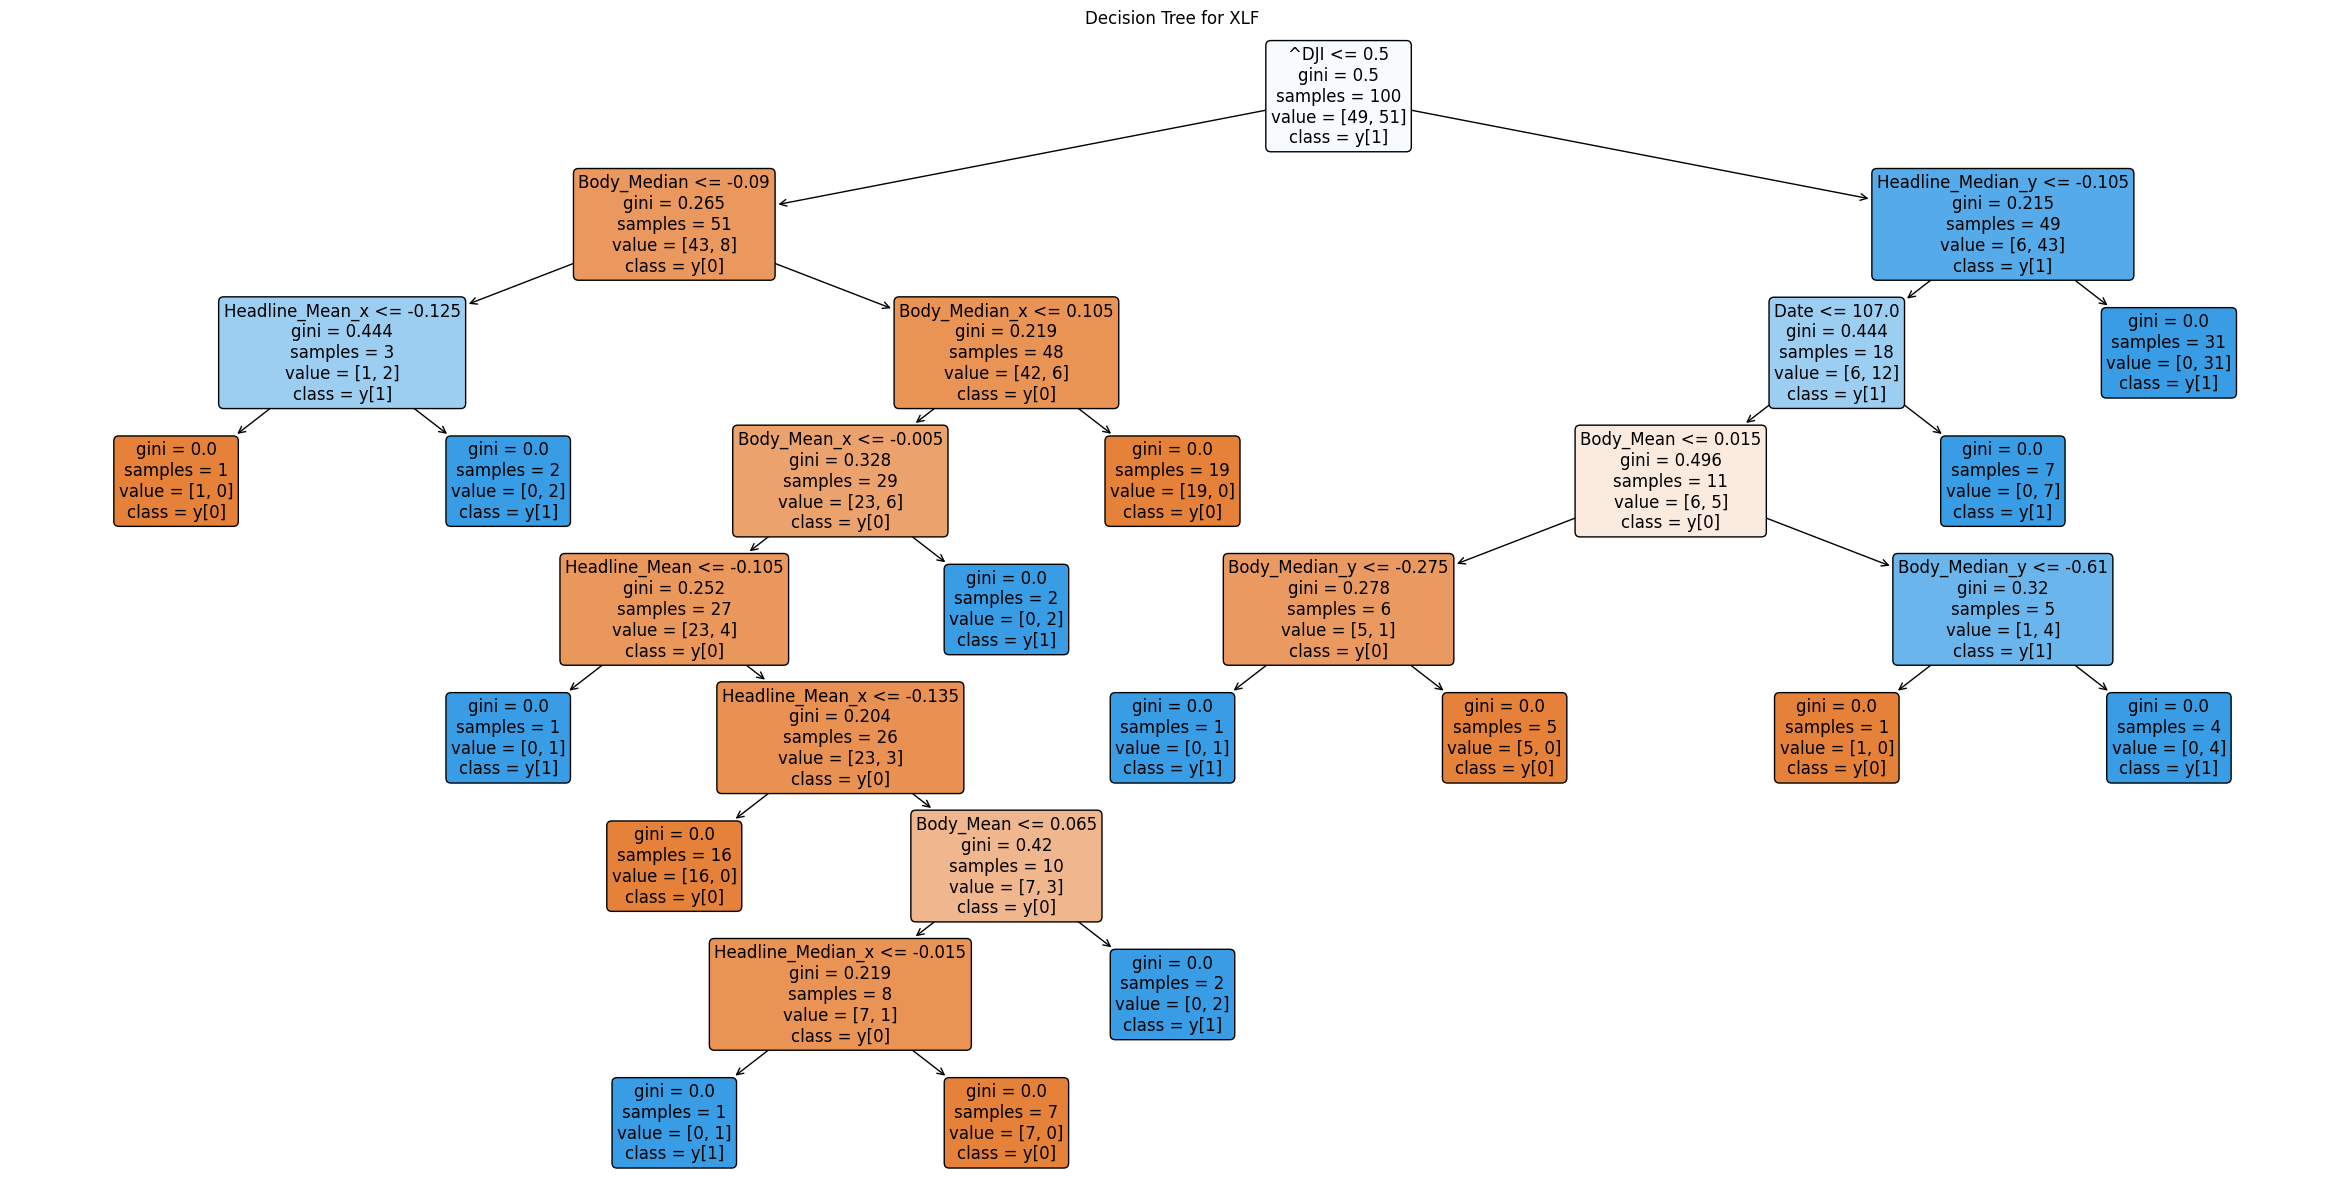

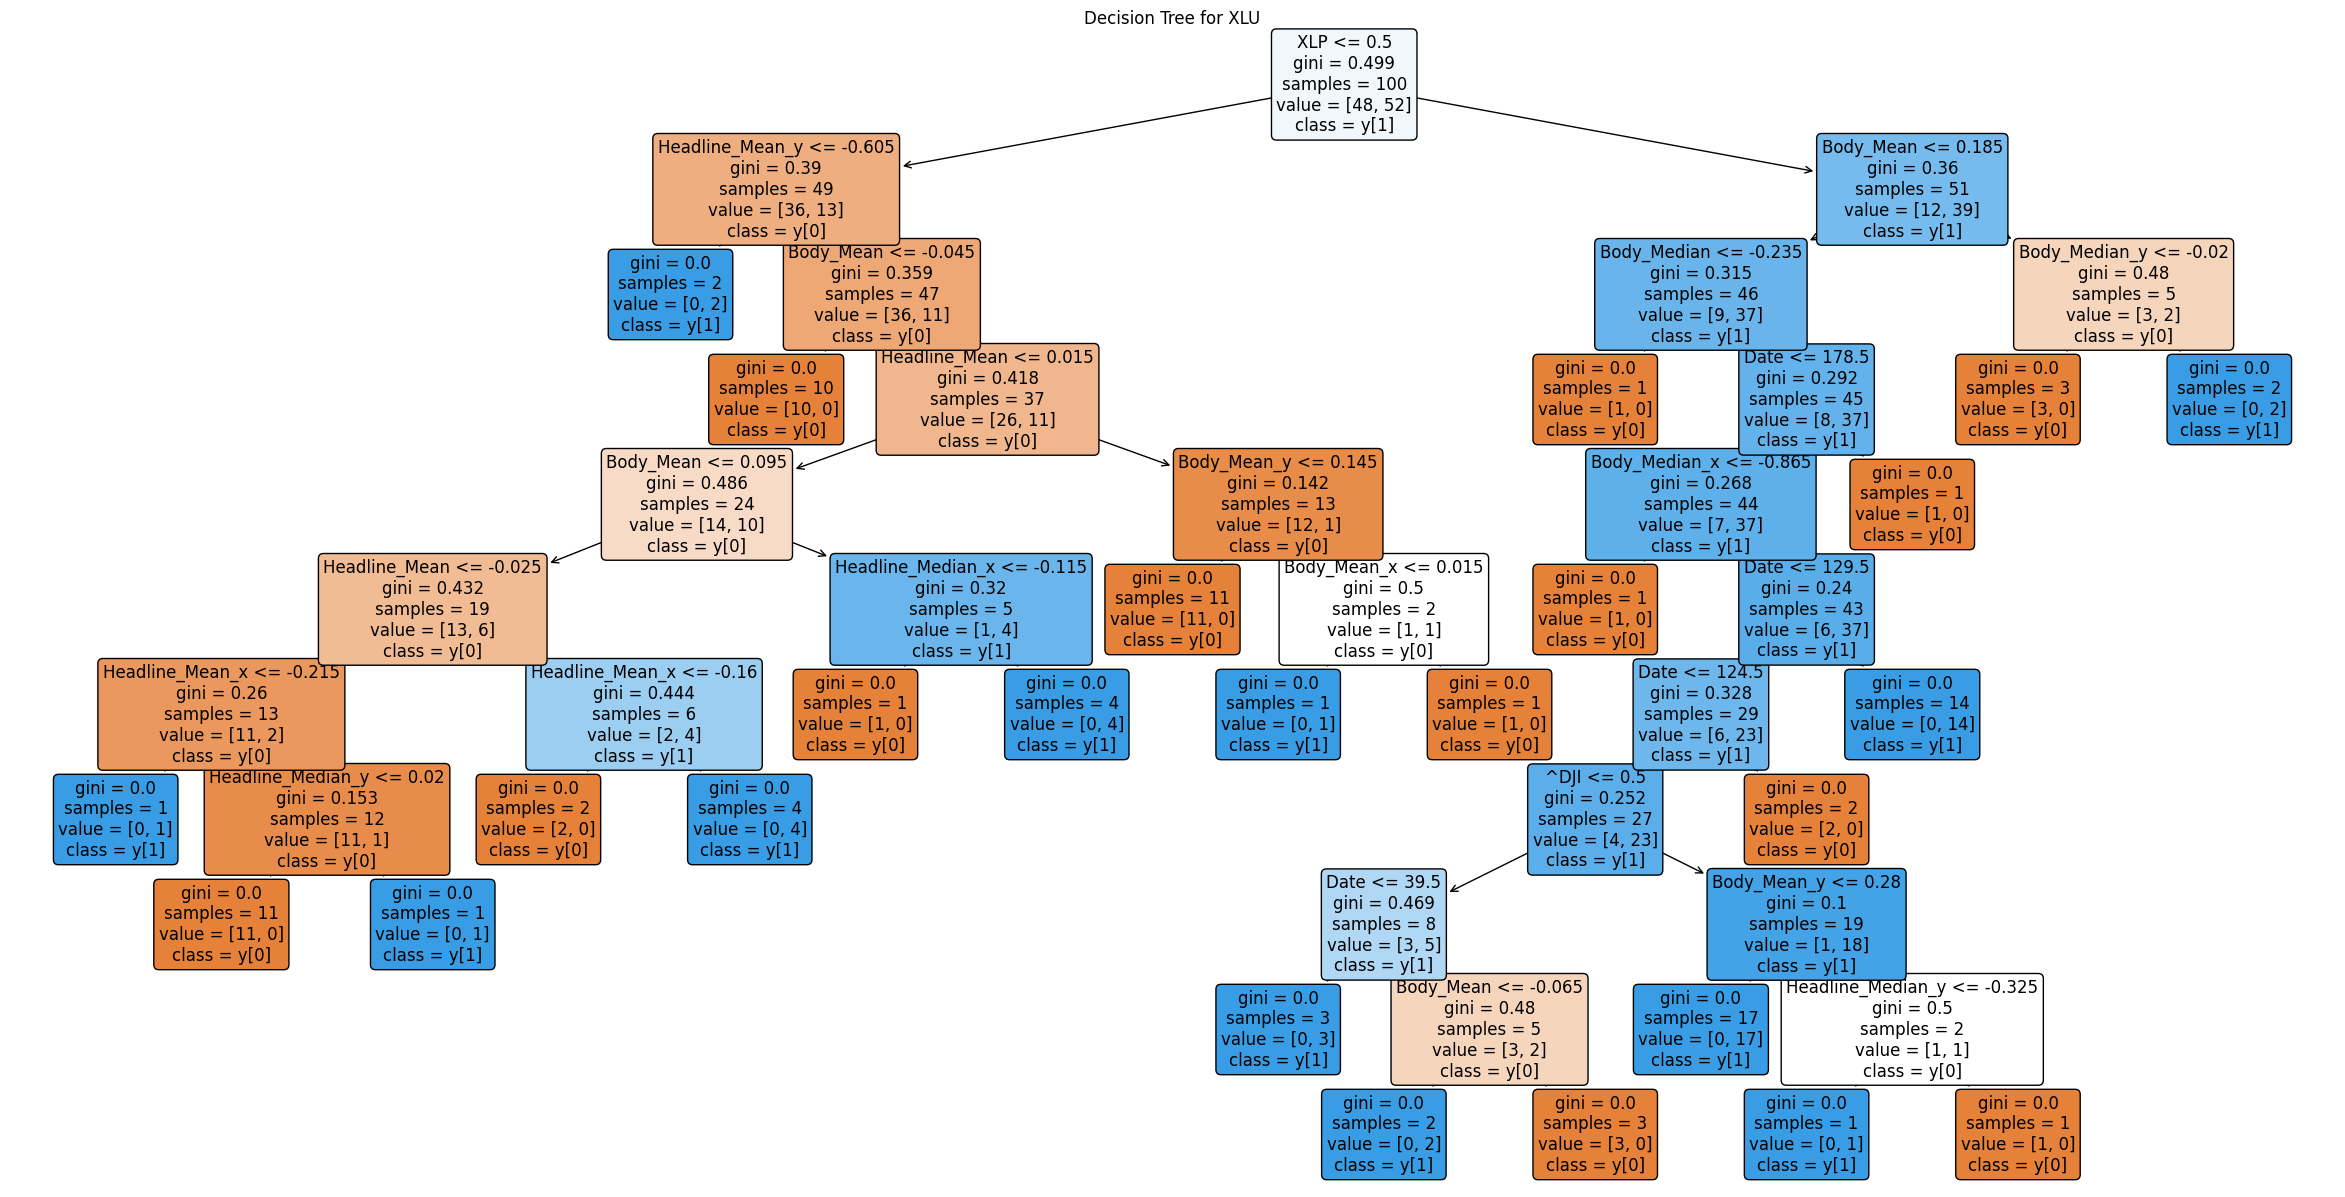

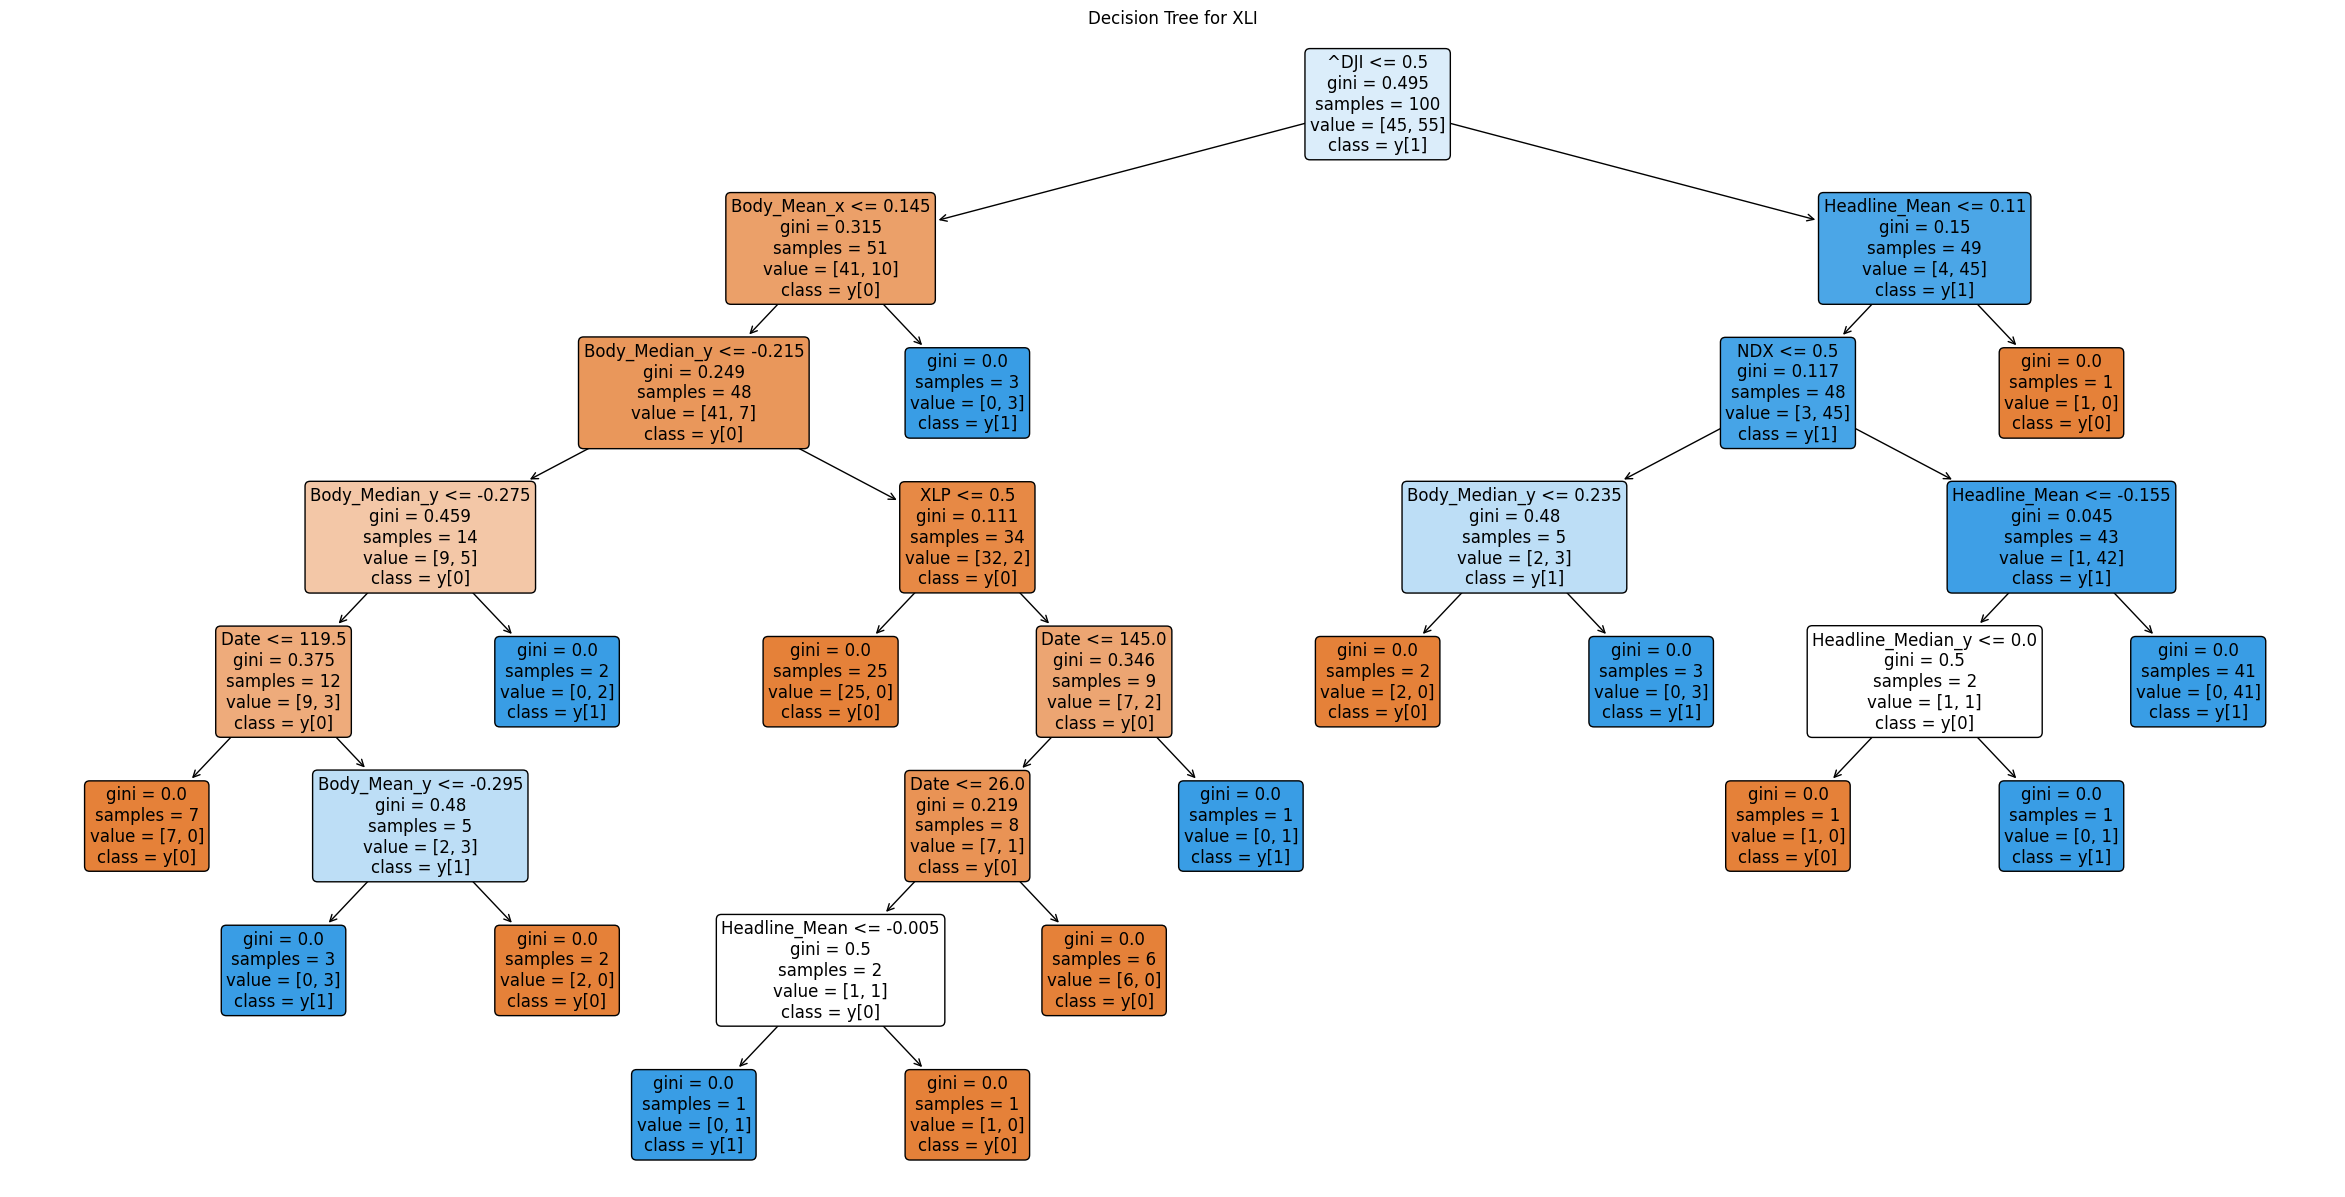

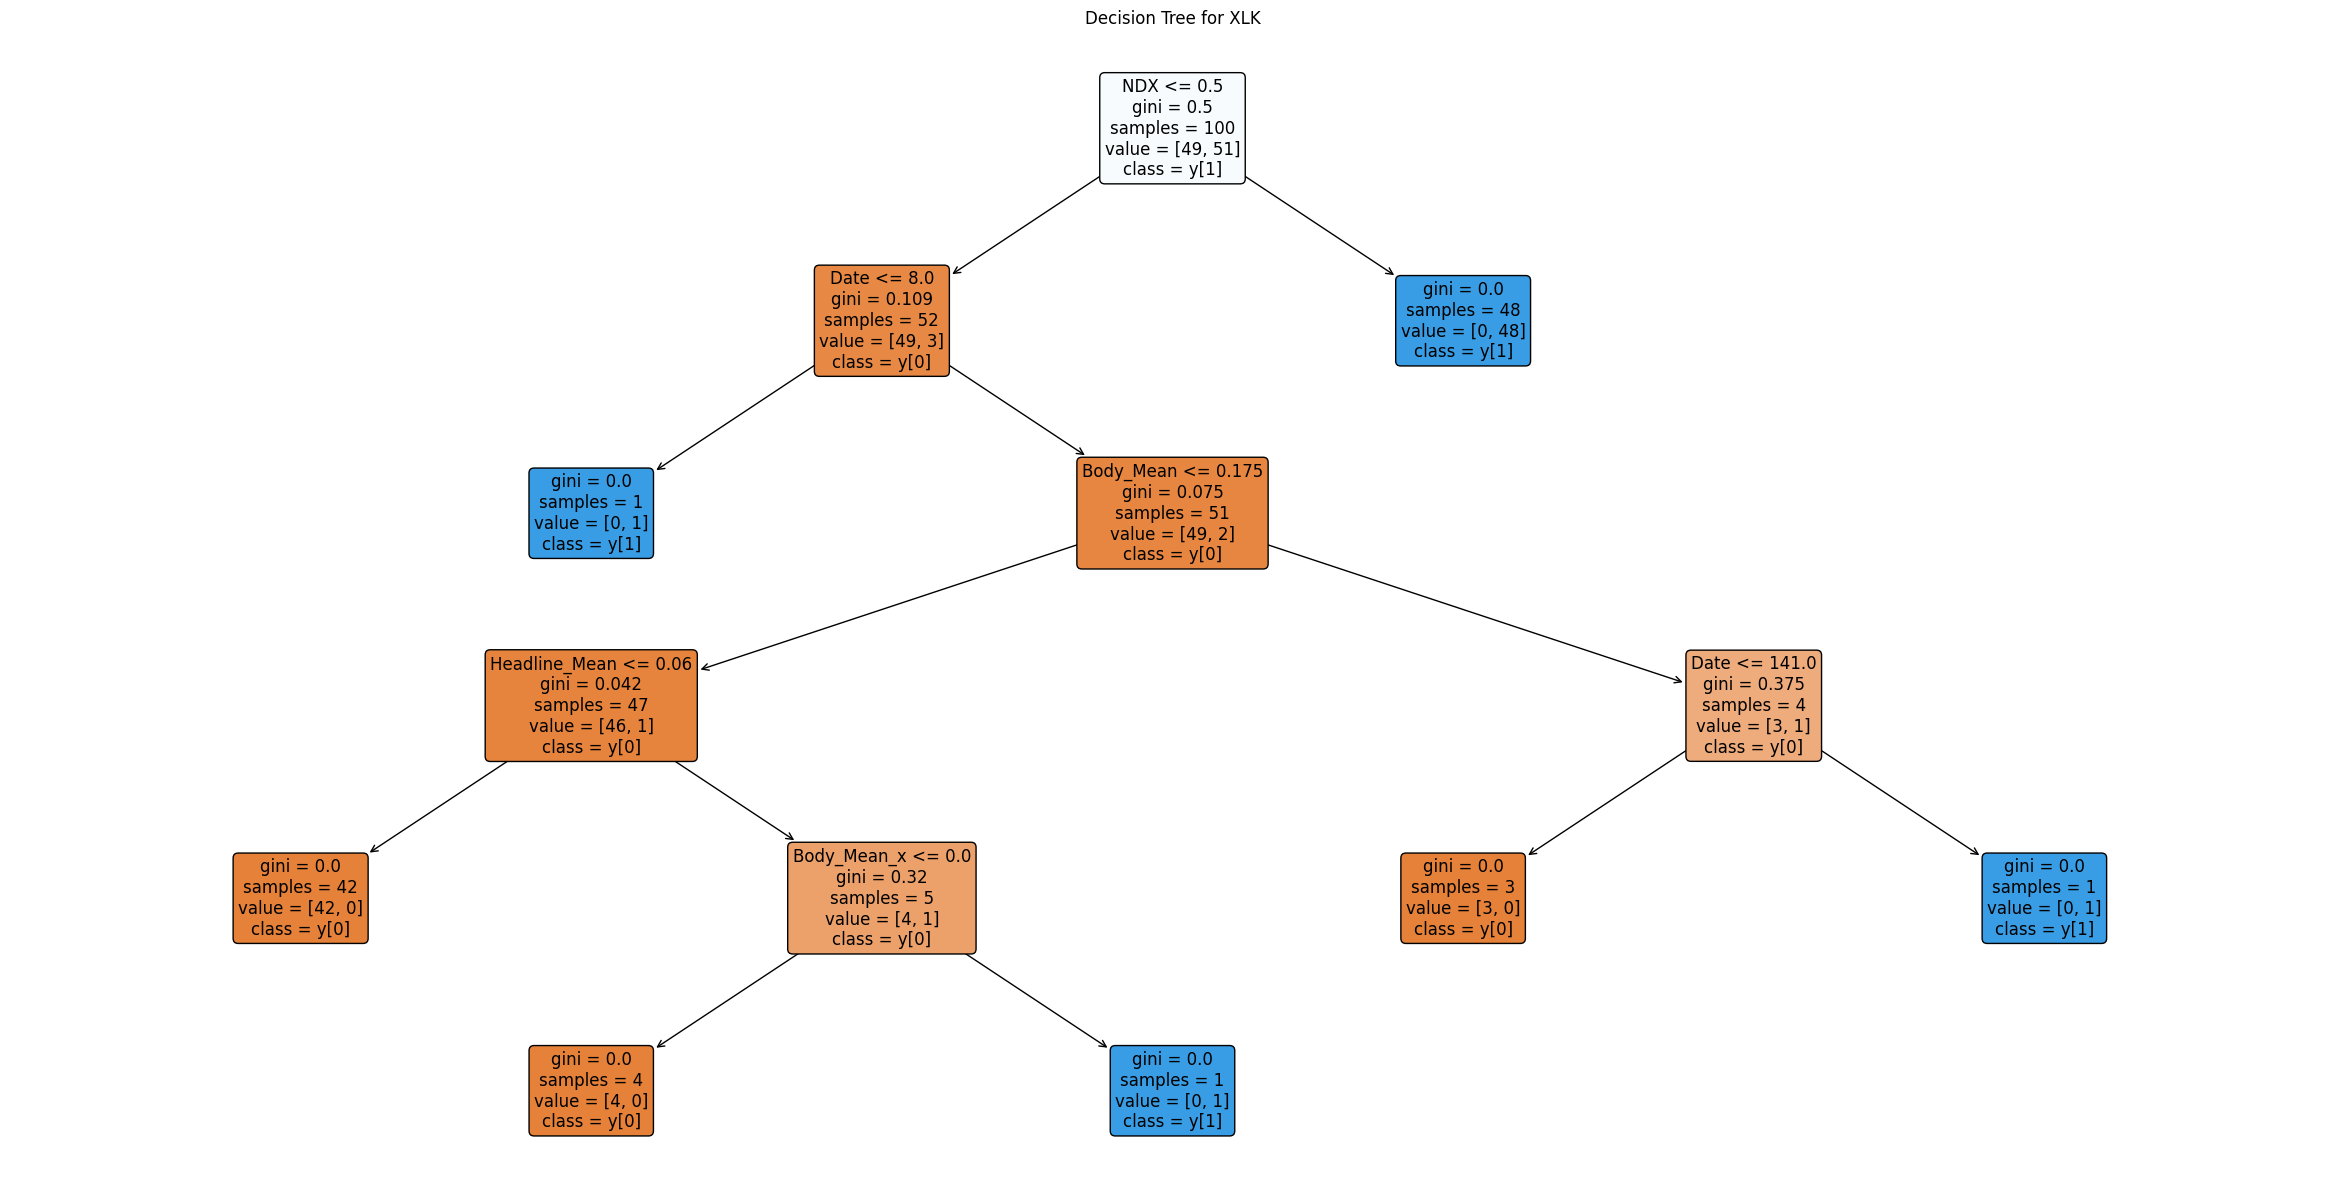

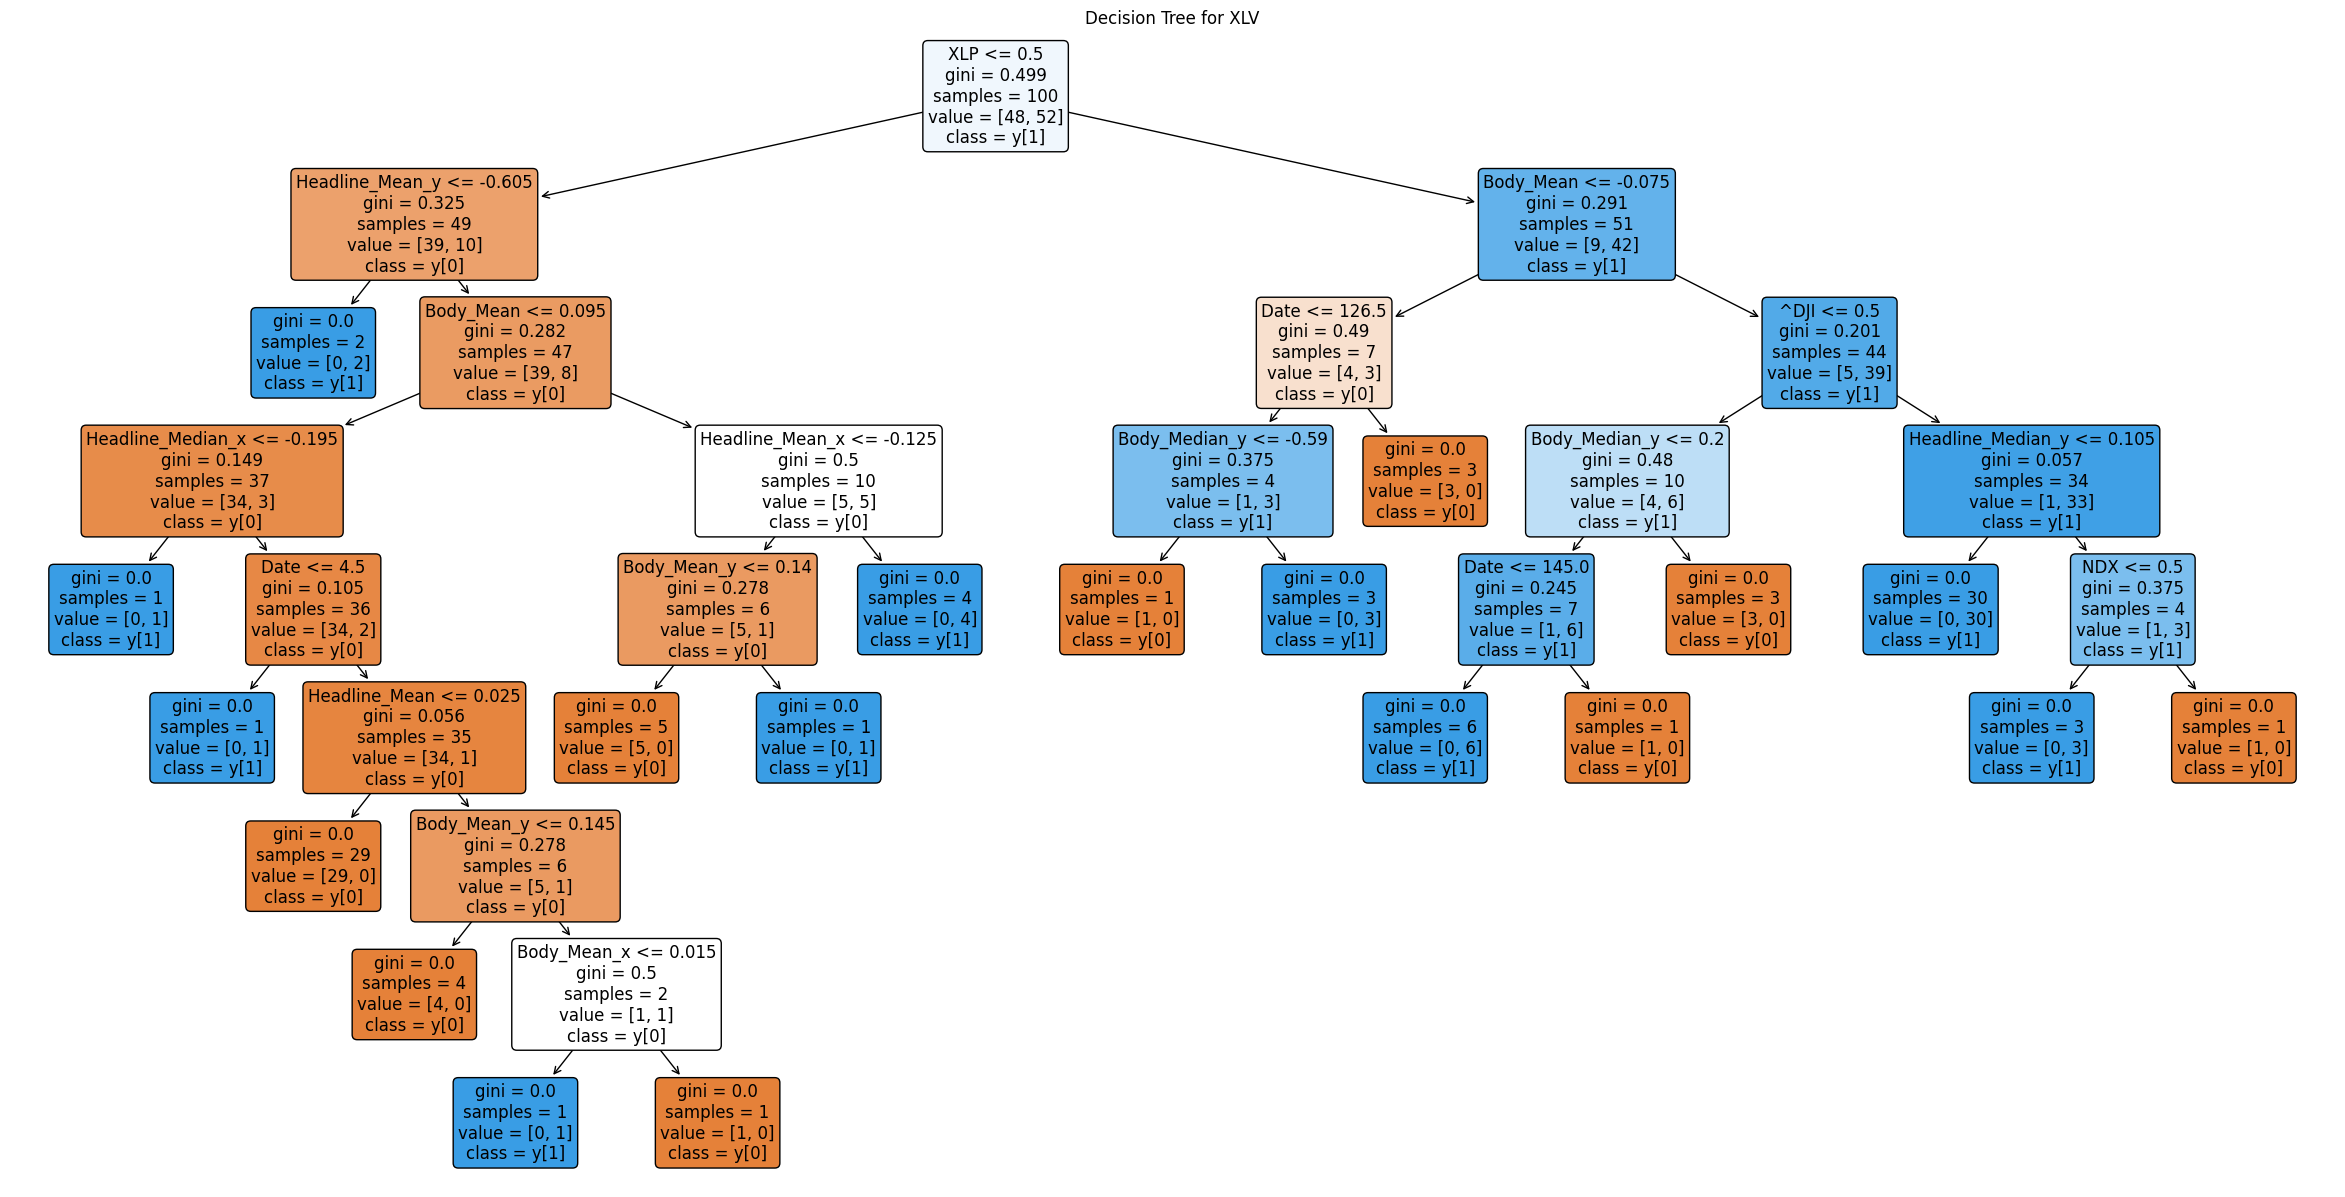

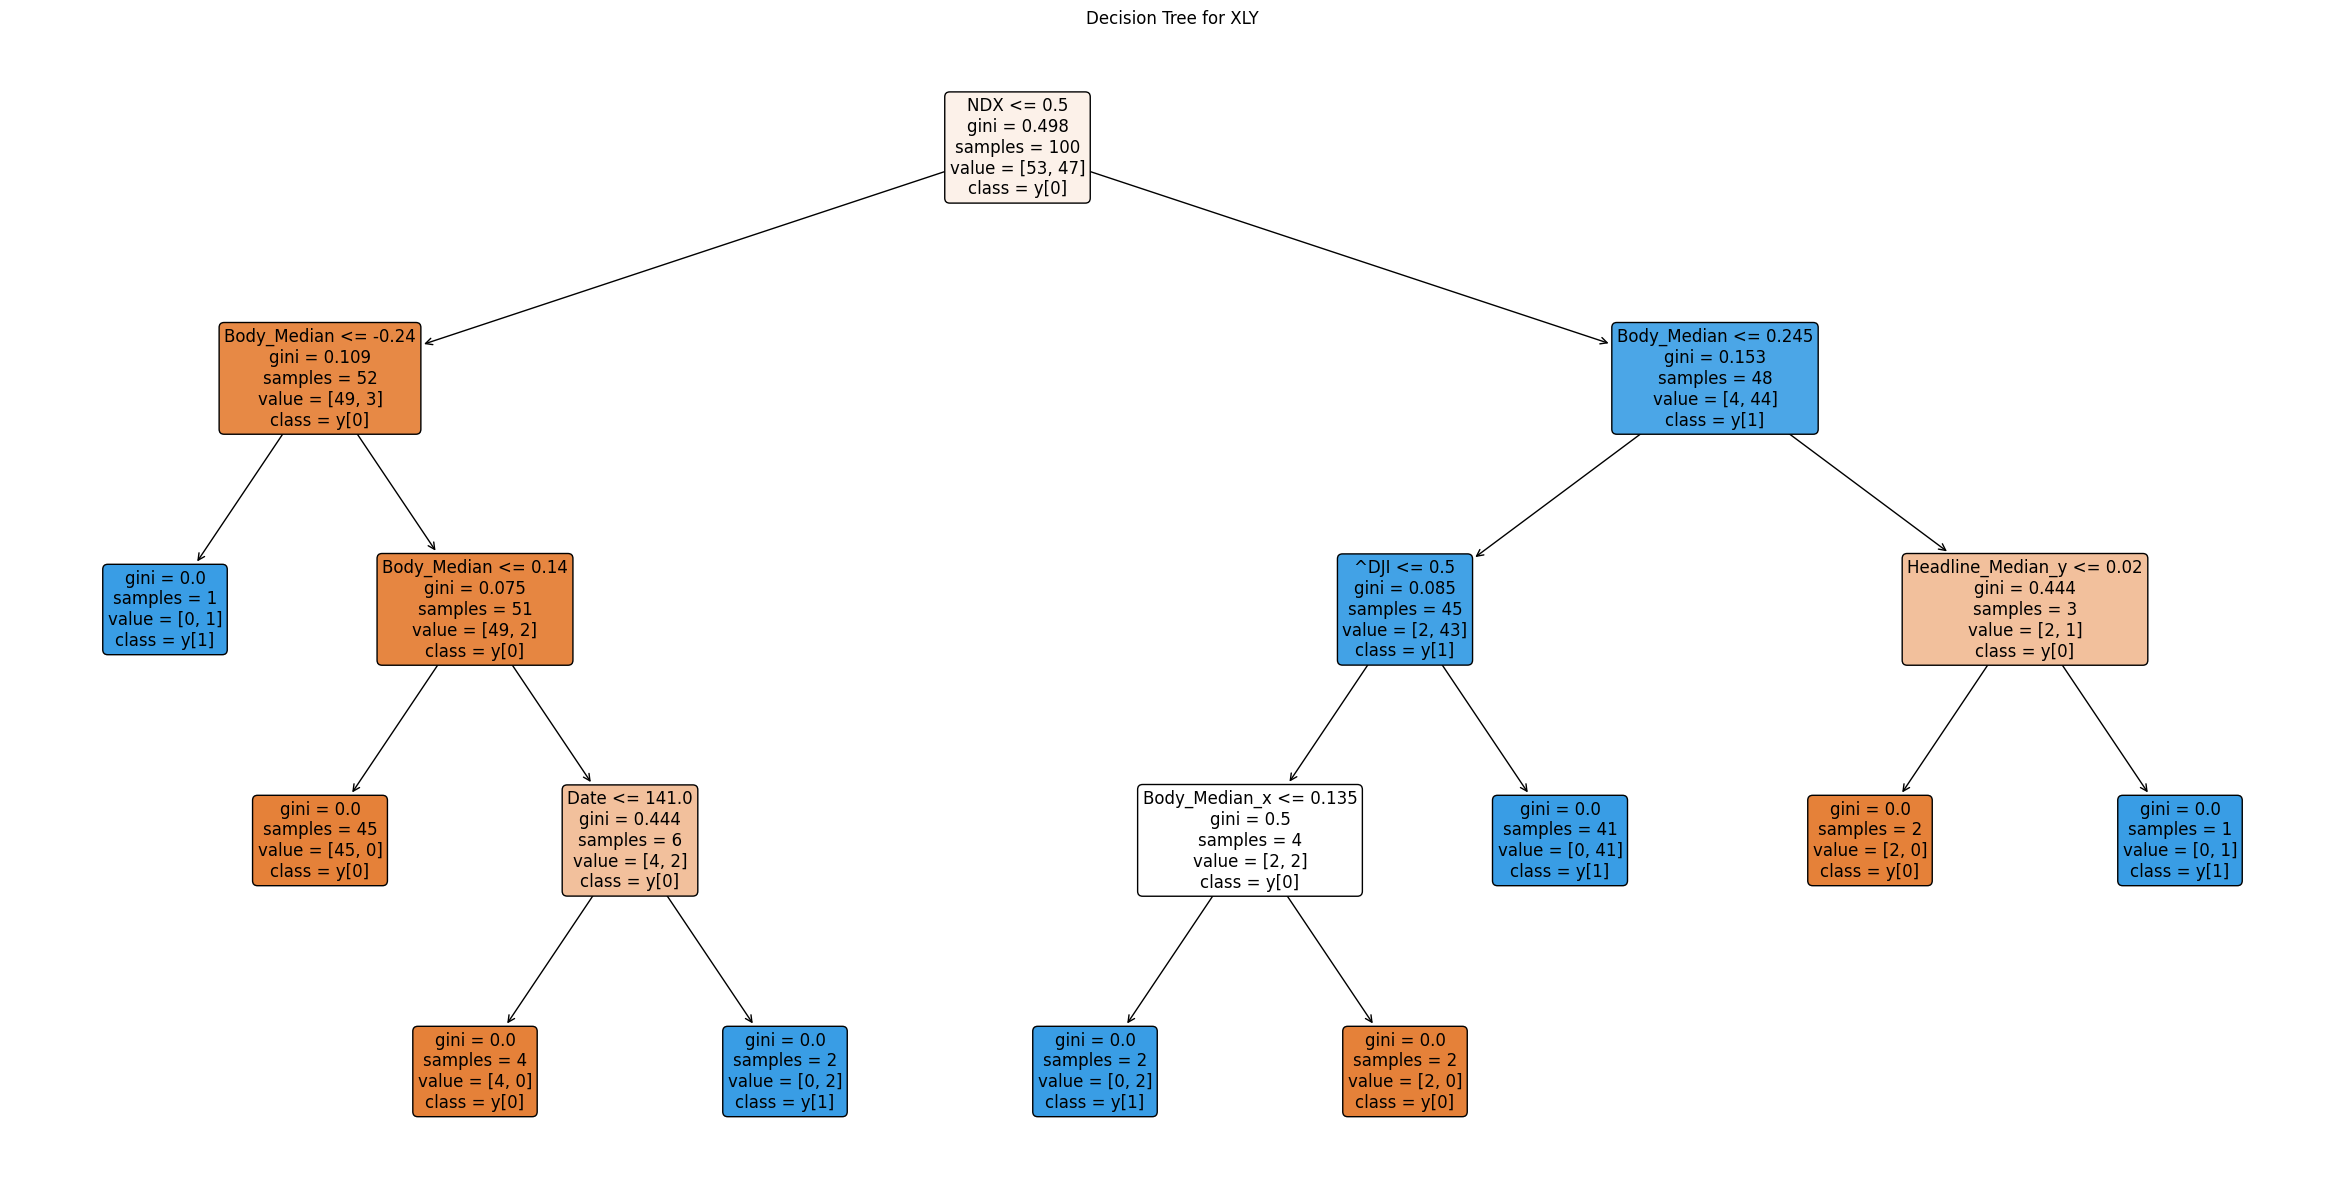

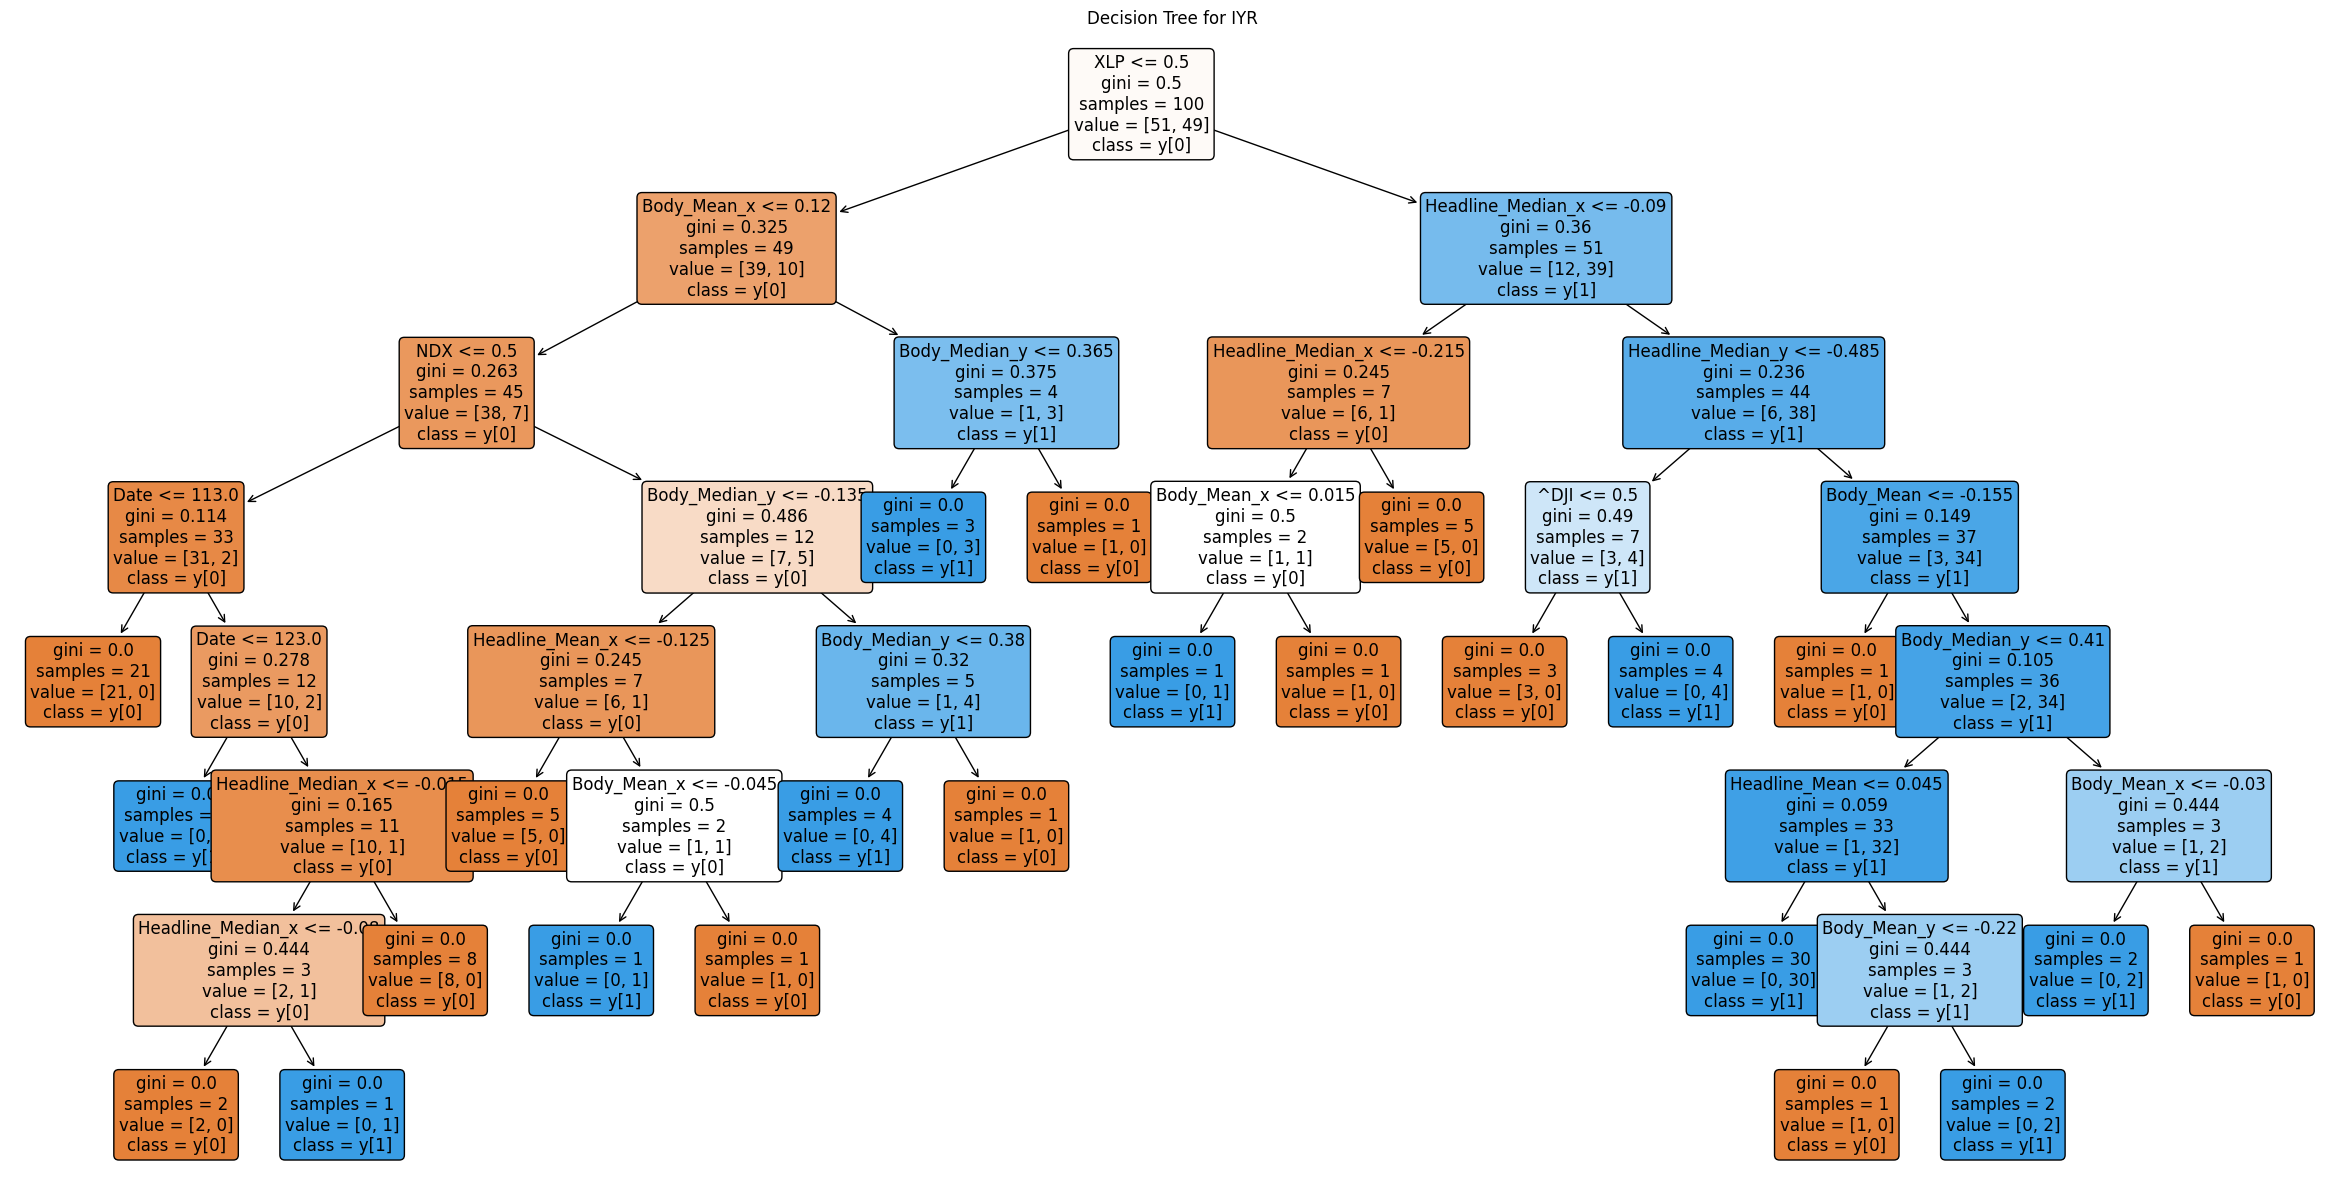

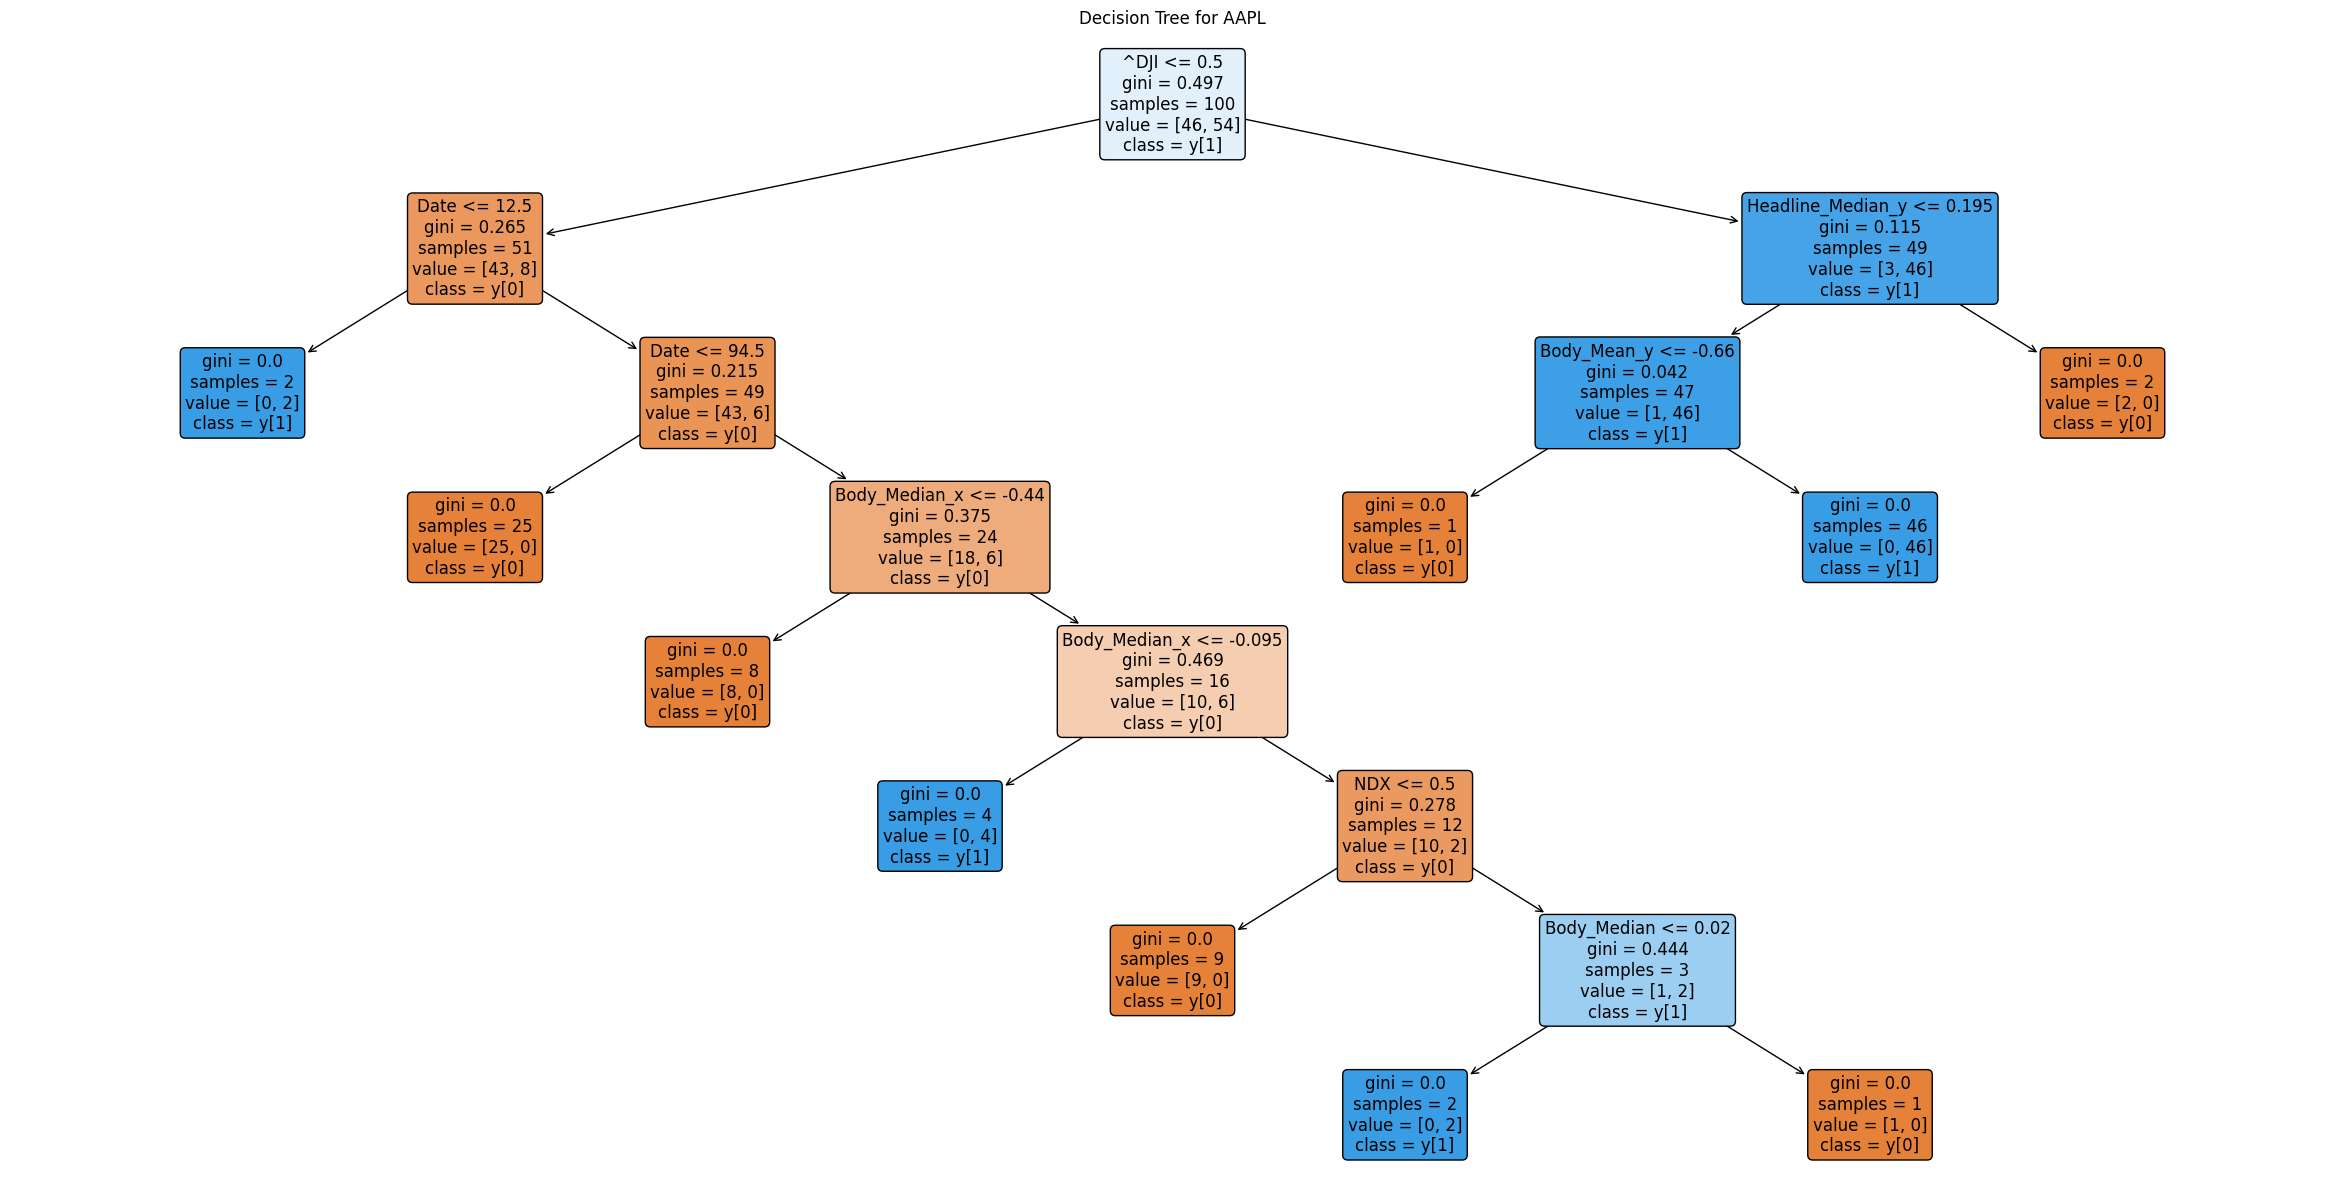

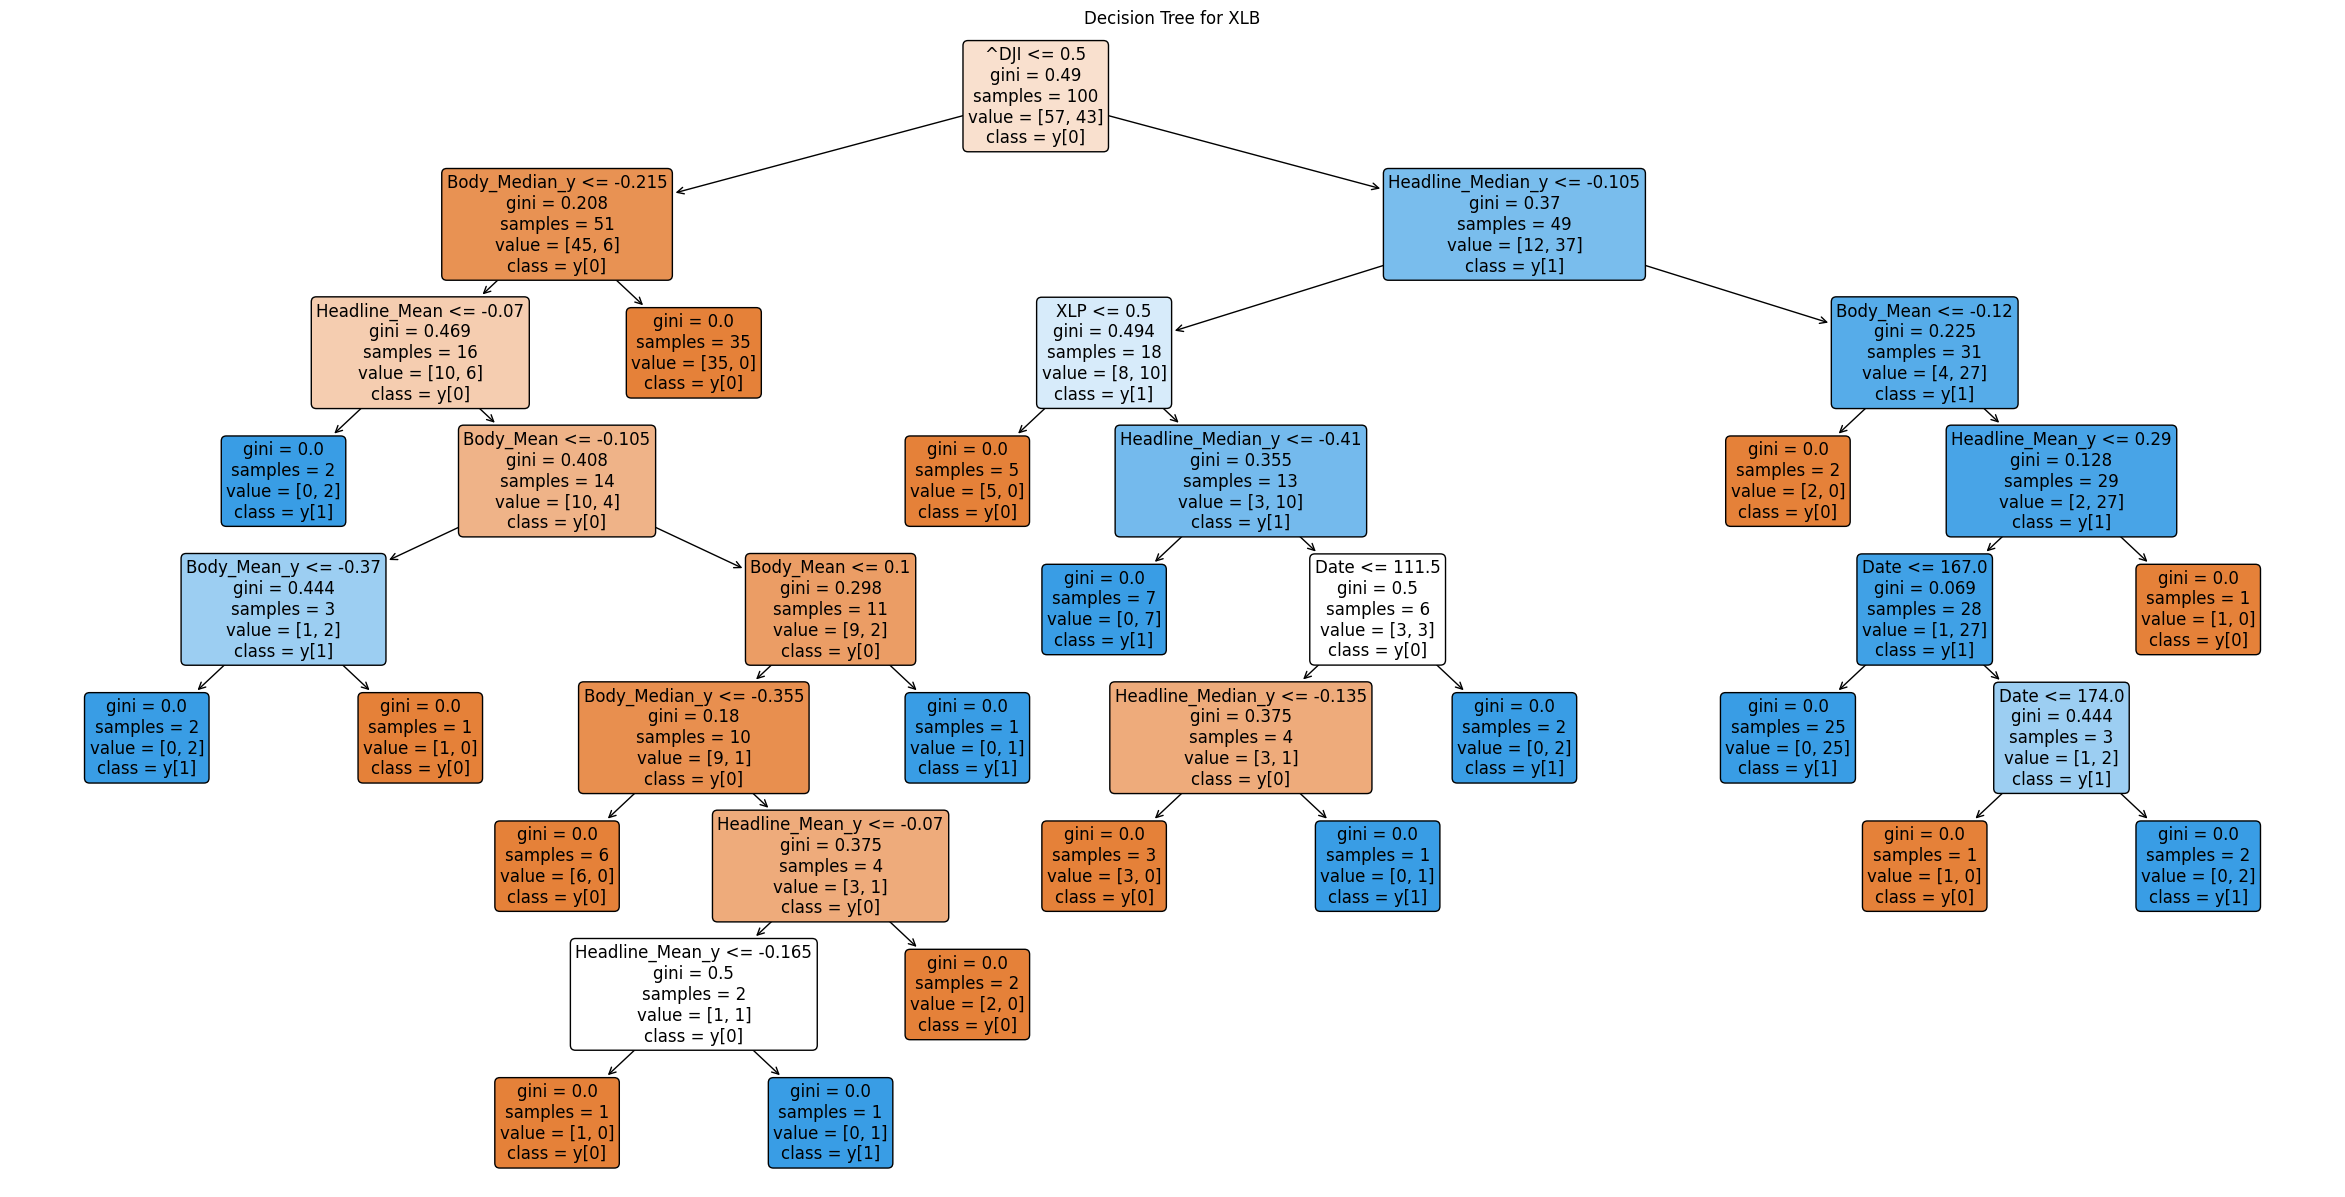

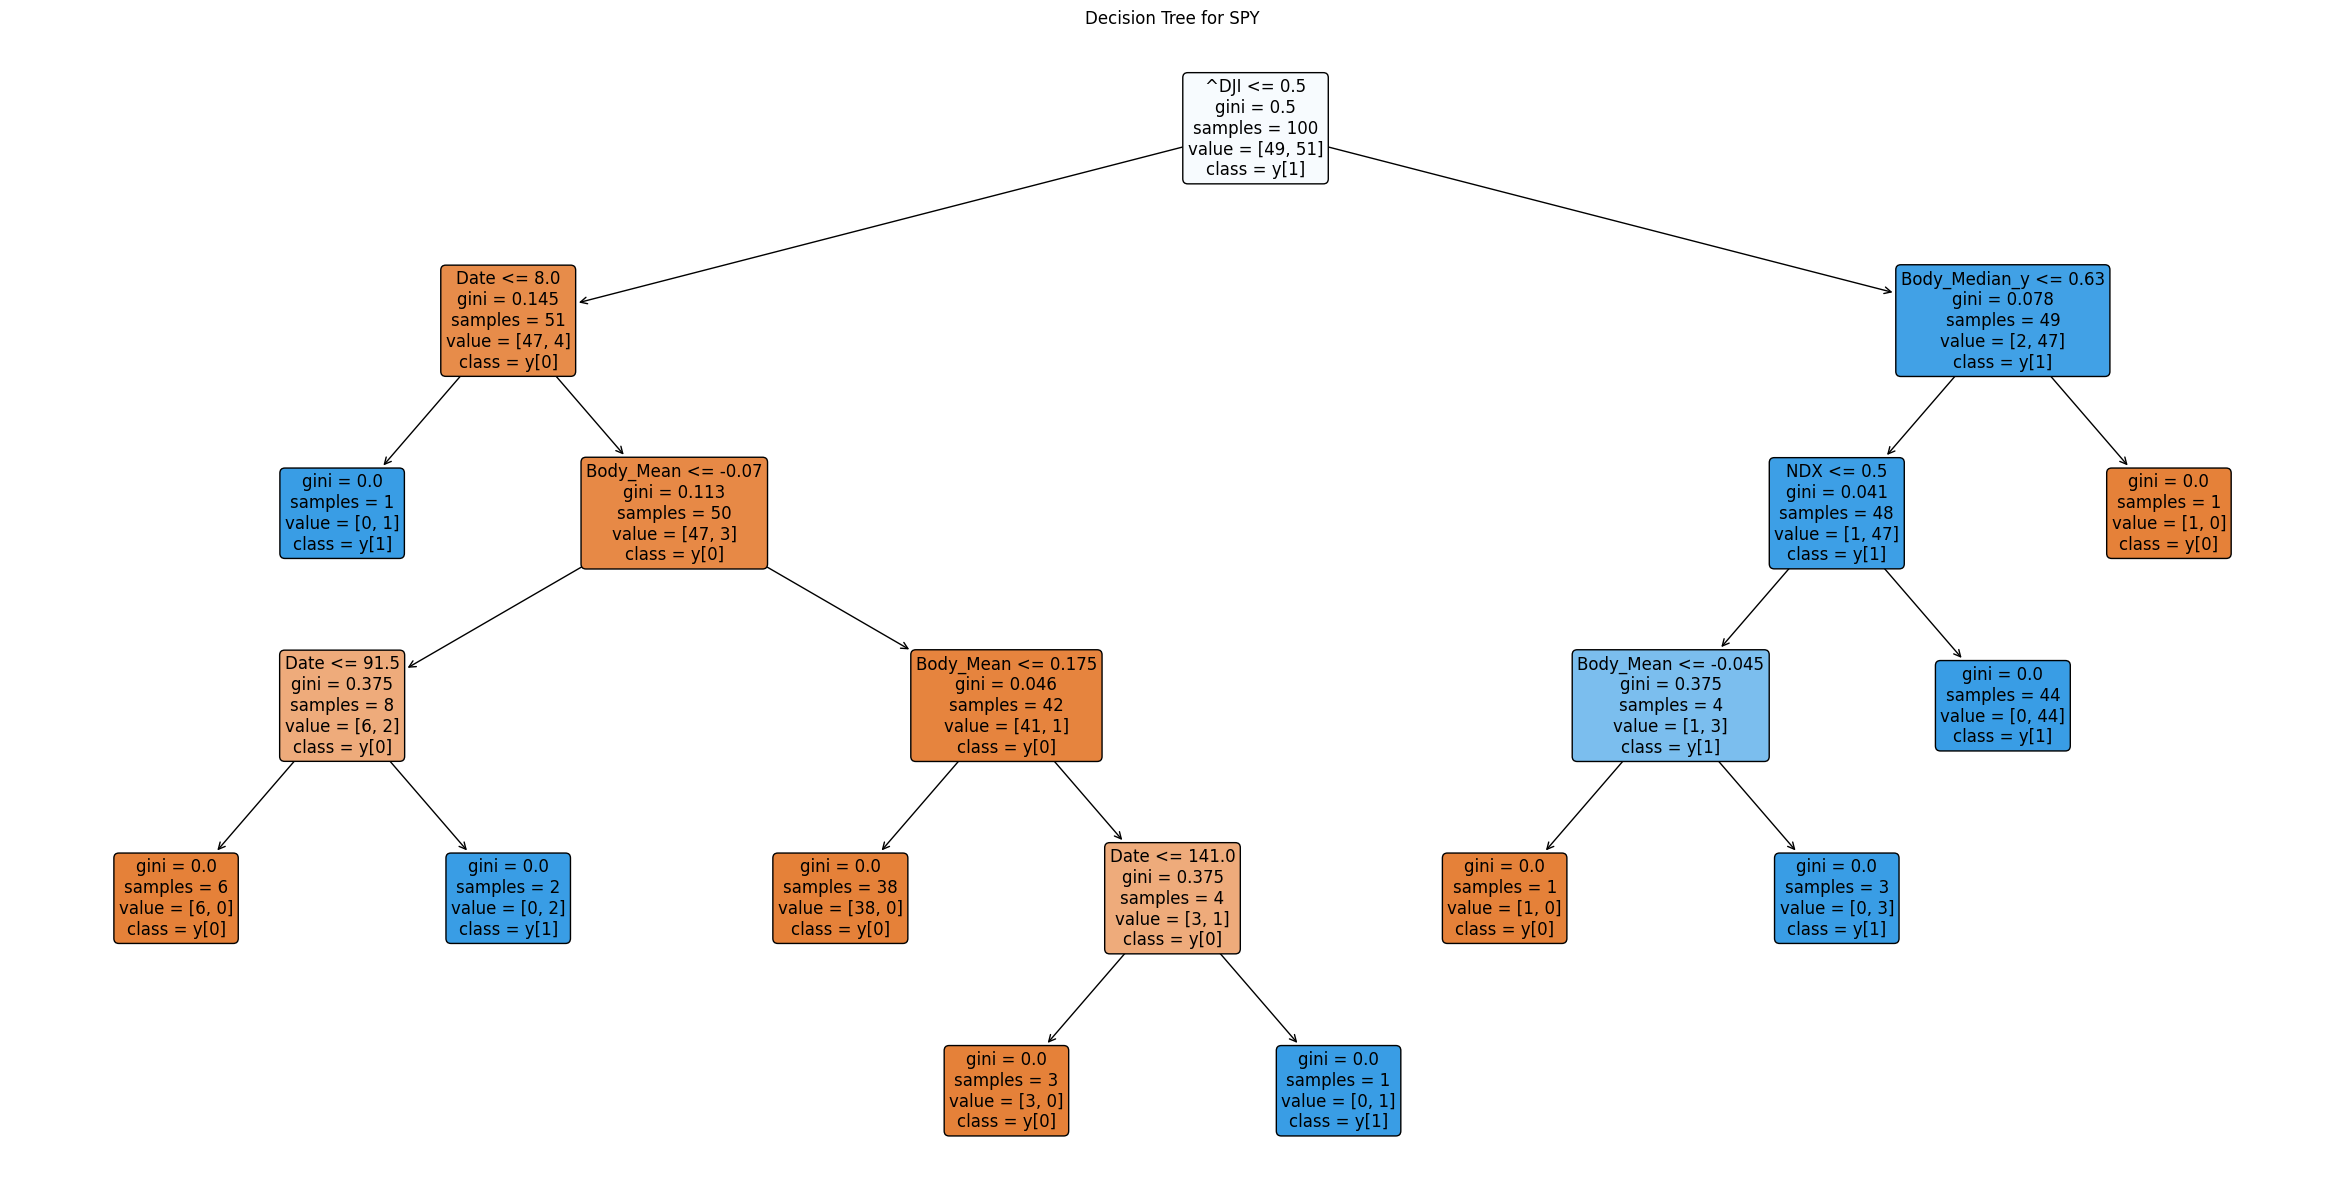

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert the 'Date' column to the number of days since '2022-03-14'
reference_date = pd.Timestamp('2022-03-14')
daily_stock_mixed_news['Date'] = (pd.to_datetime(daily_stock_mixed_news['Date']) - reference_date).dt.days

# Define the list of target columns
target_columns = ['XLE', 'XLF', 'XLU', 'XLI', 'XLK', 'XLV', 'XLY', 'IYR', 'AAPL', 'XLB', 'SPY']

# Select the features and target columns
X = daily_stock_mixed_news.drop(target_columns, axis=1)
y = daily_stock_mixed_news[target_columns]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the multi-output decision tree classifier
base_classifier = DecisionTreeClassifier(random_state=42)
multi_output_clf = MultiOutputClassifier(base_classifier)
multi_output_clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = multi_output_clf.predict(X_test)

# Evaluate the model for each target column
for idx, target_col in enumerate(target_columns):
    accuracy = accuracy_score(y_test.iloc[:, idx], y_pred[:, idx])
    print(f"Accuracy for {target_col}: {accuracy:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test.iloc[:, idx], y_pred[:, idx]))

# Visualize each decision tree
for idx, (target_col, estimator) in enumerate(zip(target_columns, multi_output_clf.estimators_)):
    plt.figure(figsize=(30, 15))
    plot_tree(estimator, feature_names=X.columns, class_names=True, filled=True, rounded=True, fontsize=12)
    plt.title(f"Decision Tree for {target_col}")
    plt.savefig(f"decision_tree_{target_col}.png")  # Save the tree as an image file
    plt.show()    

These results suggest that the multi-output decision tree classifier performs relatively well on certain stock indicators (e.g., XLI and XLK), while it struggles more with others (e.g., XLU and IYR). You may consider fine-tuning the model or exploring other machine learning techniques to improve the overall performance across all indicators.